# **Telecom X - Análisis de Evasión de Clientes**

Has sido contratado como asistente de análisis de datos en Telecom X y formarás parte del proyecto "Churn de Clientes". La empresa enfrenta una alta tasa de cancelaciones y necesita comprender los factores que llevan a la pérdida de clientes.

Tu desafío será recopilar, procesar y analizar los datos, utilizando Python y sus principales bibliotecas para extraer información valiosa. A partir de tu análisis, el equipo de Data Science podrá avanzar en modelos predictivos y desarrollar estrategias para reducir la evasión.

## **📌 Extracción(E - Extract)**

In [230]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
!pip install -U kaleido

In [231]:
df = pd.read_json('https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json')
cliente=pd.json_normalize(df['customer'])
phone=pd.json_normalize(df['phone'])
internet=pd.json_normalize(df['internet'])
account=pd.json_normalize(df['account'])
datosIniciales=pd.concat([df['customerID'],df['Churn']],axis=1)

In [232]:
#Ver las columnas que tengo, para ver cuales necesito quitar.
print(df.columns)

Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')


In [233]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [234]:
columnas_dict = ['customer', 'phone', 'internet', 'account']
# Transformar columnas con diccionarios a columnas simples
for col in columnas_dict:
    df_temp = pd.json_normalize(df[col])
    df = pd.concat([df, df_temp], axis=1)
    df.drop(columns=[col], inplace=True)

In [235]:
## Crear la columna cuentas diarias
df["Cuentas_Diarias"] = df["Charges.Monthly"] / 30
df["Cuentas_Diarias"] = df["Cuentas_Diarias"].round(2)

In [236]:
df.reset_index(inplace = True, drop = True)
df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,No,No,13,Yes,No,DSL,...,No,Yes,No,No,One year,No,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,Yes,No,22,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,No,No,2,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,Yes,Yes,67,Yes,No,DSL,...,Yes,Yes,No,Yes,Two year,No,Mailed check,67.85,4627.65,2.26


In [237]:
# Columnas que deben ser transformadas
bin_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']

# Aplicar transformación a binario
for col in bin_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})


In [238]:
# Reemplazar No phone service por No en la columna MultipleLines
df['MultipleLines'] = df['MultipleLines'].replace('No phone service', 'No')




In [239]:
# Transformar "Yes"/"No" a 1/0 en MultipleLines
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0})

#Verificar
df[['MultipleLines']].head()

,MultipleLines
0,0
1,1
2,0
3,0
4,0


## **🔧 Transformación (T - Transform)**

### Transformación de clientes

In [240]:
cliente.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7267 non-null   object
 1   SeniorCitizen  7267 non-null   int64 
 2   Partner        7267 non-null   object
 3   Dependents     7267 non-null   object
 4   tenure         7267 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 284.0+ KB


In [241]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [242]:
cliente['Partner'] = cliente['Partner'].map({'Yes': 1, 'No': 0})
cliente['Dependents'] = cliente['Dependents'].map({'Yes': 1, 'No': 0})

In [243]:
cliente.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,1,1,9
1,Male,0,0,0,9
2,Male,0,0,0,4
3,Male,1,1,0,13
4,Female,1,1,0,3


### Transformación de phone

In [244]:
phone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   PhoneService   7267 non-null   object
 1   MultipleLines  7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [245]:
phone.head()

,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [246]:
phone['MultipleLines'].unique()

array(['No', 'Yes', 'No phone service'], dtype=object)

In [247]:
columnas = ['PhoneService', 'MultipleLines']
phone[columnas] = phone[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No phone service': 0}))

In [248]:
phone.head()

,PhoneService,MultipleLines
0,1,0
1,1,1
2,1,0
3,1,0
4,1,0


### Transformación de internet

In [249]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   object
 2   OnlineBackup      7267 non-null   object
 3   DeviceProtection  7267 non-null   object
 4   TechSupport       7267 non-null   object
 5   StreamingTV       7267 non-null   object
 6   StreamingMovies   7267 non-null   object
dtypes: object(7)
memory usage: 397.5+ KB


In [250]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [251]:
#internet['OnlineSecurity'].unique()
#internet['OnlineBackup'].unique()
#internet['DeviceProtection'].unique()
#internet['TechSupport'].unique()
#internet['StreamingTV'].unique()
internet['StreamingMovies'].unique()

array(['No', 'Yes', 'No internet service'], dtype=object)

In [252]:
columnas = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
internet[columnas] = internet[columnas].apply(lambda x: x.map({'Yes': 1, 'No': 0, 'No internet service': 0}))

In [253]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   7267 non-null   object
 1   OnlineSecurity    7267 non-null   int64 
 2   OnlineBackup      7267 non-null   int64 
 3   DeviceProtection  7267 non-null   int64 
 4   TechSupport       7267 non-null   int64 
 5   StreamingTV       7267 non-null   int64 
 6   StreamingMovies   7267 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 397.5+ KB


In [254]:
internet.head()

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,0,1,0,1,1,0
1,DSL,0,0,0,0,0,1
2,Fiber optic,0,0,1,0,0,0
3,Fiber optic,0,1,1,0,1,1
4,Fiber optic,0,0,0,1,1,0


### Transformación cuenta

In [255]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   object 
dtypes: float64(1), object(4)
memory usage: 284.0+ KB


In [256]:
account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [257]:
cantidad_vacios = account['Charges.Total'].str.strip().eq('').sum()
cantidad_vacios

np.int64(11)

In [258]:
cantidad_nan = account['Charges.Total'].isna().sum()
cantidad_nan

np.int64(0)

In [259]:
account['Charges.Total'] = pd.to_numeric(
    account['Charges.Total'].str.replace(r'[\$,]', '', regex=True),
    errors='coerce'
).fillna(0)

In [260]:
account['Charges.Total']

,Charges.Total
0,593.30
1,542.40
2,280.85
3,1237.85
4,267.40
...,...
7262,742.90
7263,1873.70
7264,92.75
7265,4627.65


In [261]:
account.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Contract          7267 non-null   object 
 1   PaperlessBilling  7267 non-null   object 
 2   PaymentMethod     7267 non-null   object 
 3   Charges.Monthly   7267 non-null   float64
 4   Charges.Total     7267 non-null   float64
dtypes: float64(2), object(3)
memory usage: 284.0+ KB


In [262]:
pd.unique(account['Contract'])

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [263]:
# Reemplazar valores en la columna 'Contract'
df['Contract'] = df['Contract'].replace({
    'Month-to-month': '1',
    'One year': '2',
    'Two year': '3'
})

df['Contract'] = df['Contract'].astype('int64')


df['Contract'].value_counts()


,count
Contract,
1,4005
3,1743
2,1519


In [264]:
# Columnas que se transformarán: "Sí" → 1, todo lo demás → 0
cols_to_binary = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies']

# Aplicar transformación
for col in cols_to_binary:
    df[col] = df[col].apply(lambda x: 1 if x == 'Yes' else 0)


df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [265]:
#verificar si hay valores repetidos en la columna 'customerID'
df['customerID'].duplicated().sum()
df


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,2,1,Mailed check,65.60,593.3,2.19
1,0003-MKNFE,No,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,1,0,Mailed check,59.90,542.4,2.00
2,0004-TLHLJ,Yes,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,1,1,Electronic check,73.90,280.85,2.46
3,0011-IGKFF,Yes,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,1,1,Electronic check,98.00,1237.85,3.27
4,0013-EXCHZ,Yes,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,1,1,Mailed check,83.90,267.4,2.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,No,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,2,0,Mailed check,55.15,742.9,1.84
7263,9992-RRAMN,Yes,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,1,1,Electronic check,85.10,1873.7,2.84
7264,9992-UJOEL,No,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,1,1,Mailed check,50.30,92.75,1.68
7265,9993-LHIEB,No,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,3,0,Mailed check,67.85,4627.65,2.26


In [266]:
# Diccionario para abreviar las formas de pago
payment_map = {
    'Electronic check': '1',
    'Mailed check': '2',
    'Bank transfer (automatic)': '3',
    'Credit card (automatic)': '4'
}

# Aplicar la transformación en la columna MetodoPago
df['PaymentMethod'] = df['PaymentMethod'].replace(payment_map)

# Verificar
df['PaymentMethod'].value_counts()


,count
PaymentMethod,
1,2445
2,1665
3,1589
4,1568


In [267]:
# Crear un diccionario con los nuevos nombres de las columnas
column_rename_map = {
    'customerID': 'id_cliente',
    'Churn': 'evasion',
    'gender': 'genero',
    'SeniorCitizen': 'senior',
    'Partner': 'pareja',
    'Dependents': 'dependientes',
    'tenure': 'antiguedad',
    'PhoneService': 's_telefono',
    'MultipleLines': 'multipleslineas',
    'InternetService': 's_internet',
    'OnlineSecurity': 'seguridad_ol',
    'OnlineBackup': 'respaldo_ol',
    'DeviceProtection': 'proteccion_d',
    'TechSupport': 'serv_tec',
    'StreamingTV': 'tv_str',
    'StreamingMovies': 'pel_str',
    'Contract': 'contrato',
    'PaperlessBilling': 'boleta_elec',
    'PaymentMethod': 'met_pago',
    'Charges.Monthly': 'pago_mensual',
    'Charges.Total': 'pago_total',
    'Cuentas_Diarias': 'cuentas_diarias'
}

# Renombrar columnas en df
df.rename(columns=column_rename_map, inplace=True)

# Verificar los nuevos nombres de columnas
df.columns

Index(['id_cliente', 'evasion', 'genero', 'senior', 'pareja', 'dependientes',
       'antiguedad', 's_telefono', 'multipleslineas', 's_internet',
       'seguridad_ol', 'respaldo_ol', 'proteccion_d', 'serv_tec', 'tv_str',
       'pel_str', 'contrato', 'boleta_elec', 'met_pago', 'pago_mensual',
       'pago_total', 'cuentas_diarias'],
      dtype='object')

In [268]:
# Reemplazar 'Yes' por 'Sí' en la columna 'evasion'
df['evasion'] = df['evasion'].replace({'Yes': '1'}).replace({'':'0'}).replace({'No': '0'}).replace({'Si': '1'})

df['evasion'] = df['evasion'].astype('int64')

# Verificar los cambios
df['evasion'].value_counts()

,count
evasion,
0,5398
1,1869


In [269]:
pd.unique(account['PaperlessBilling'])

array(['Yes', 'No'], dtype=object)

In [270]:

# Reemplazar female y male en la columna genero
df['genero'] = df['genero'].replace({'Female': '1'}).replace({'Male':'0'})

df['genero'] = df['genero'].astype('int64')

# Verificar los cambios
df['genero'].value_counts()

,count
genero,
0,3675
1,3592


In [271]:
# Reemplazar servicios de internet en la columna s_internet
df['s_internet'] = df['s_internet'].replace({'Fiber optic': '1'}).replace({'DSL':'2'}).replace({'No':'0'})

df['s_internet'] = df['s_internet'].astype('int64')

# Verificar los cambios
df['s_internet'].value_counts()

,count
s_internet,
1,3198
2,2488
0,1581


In [272]:
# Convertir pago_total a numérico
df['pago_total'] = pd.to_numeric(df['pago_total'], errors='coerce')

# Reemplazar valores faltantes usando antigüedad * pago_mensual
mask = df['pago_total'].isna()
df.loc[mask, 'pago_total'] = (
    df.loc[mask, 'antiguedad'] * df.loc[mask, 'pago_mensual']
)



# cambiar tipo de dato de la columna contrato a int64
df['contrato'] = df['contrato'].astype('int64')

# Verificar
df['contrato'].value_counts()

,count
contrato,
1,4005
3,1743
2,1519


In [273]:
# cambiar tipo de dato de la columna met_pago a int64
df['met_pago'] = df['met_pago'].astype('int64')

# Verificar
df['met_pago'].value_counts()

,count
met_pago,
1,2445
2,1665
3,1589
4,1568


In [310]:
dt.head()

NameError: name 'dt' is not defined

In [274]:
#Guardar
df.to_csv('df_final.csv', index=False)

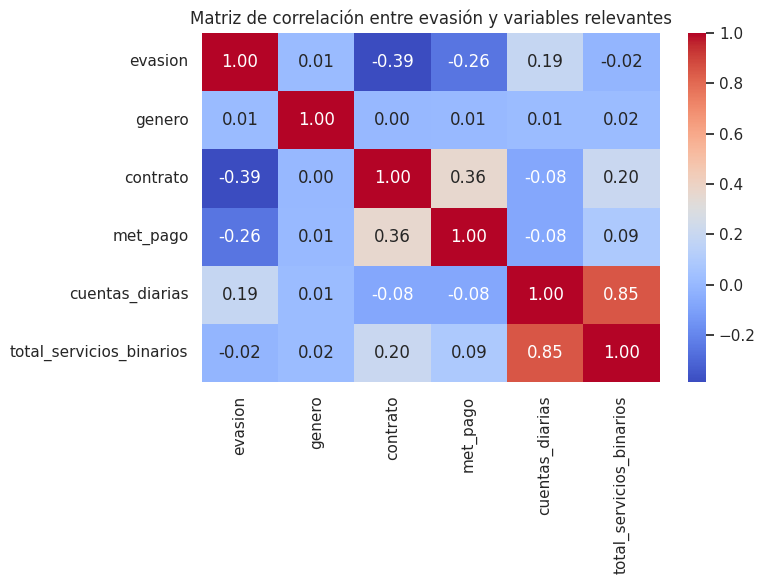

In [275]:
# Matriz correlación
# Crear columnas necesarias
columnas_servicios = [
    's_telefono', 'multipleslineas', 's_internet', 'seguridad_ol', 'respaldo_ol',
    'proteccion_d', 'serv_tec', 'tv_str', 'pel_str'
]
df['total_servicios_binarios'] = df[columnas_servicios].apply(lambda row: (row != 0).sum(), axis=1)

# Seleccionar variables relevantes
vars_corr = ['evasion', 'genero', 'contrato', 'met_pago', 'cuentas_diarias', 'total_servicios_binarios']
cor_matrix = df[vars_corr].corr()

# Visualizar heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación entre evasión y variables relevantes")
plt.tight_layout()

# Mostrar correlación ordenada con evasión
cor_matrix['evasion'].sort_values(ascending=False)

#guardar
plt.savefig("/content/matriz_correlacion.png")

plt.show()

In [276]:

import statsmodels.api as sm

# Servicios individuales como binario
servicios = [
    's_telefono', 'multipleslineas', 's_internet', 'seguridad_ol',
    'respaldo_ol', 'proteccion_d', 'serv_tec', 'tv_str', 'pel_str'
]
df[servicios] = df[servicios].applymap(lambda x: 1 if x != 0 else 0)

# Armar X y convertir a dummies
X = df[servicios + ['contrato', 'met_pago', 'genero', 'cuentas_diarias']]
X = pd.get_dummies(X, columns=['contrato', 'met_pago'], drop_first=True)
X = sm.add_constant(X)

# Asegurar tipo numérico
X = X.astype('float64')
y = df['evasion'].astype('float64')

# Alinear X e y (por si hay NaNs)
X = X.dropna()
y = y.loc[X.index]

# Ajustar el modelo
modelo = sm.OLS(y, X).fit()
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                evasion   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     143.0
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        05:39:51   Log-Likelihood:                -3300.7
No. Observations:                7267   AIC:                             6635.
Df Residuals:                    7250   BIC:                             6753.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.3140      0.023     

In [277]:
account['PaperlessBilling'] = pd.to_numeric(
    account['PaperlessBilling'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [278]:
pd.unique(account['PaymentMethod'])

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [279]:
account['Cuentas_Diarias'] = account['Charges.Monthly'] / 30.44
account['Cuentas_Diarias'] = account['Cuentas_Diarias'].round(2)
account

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,One year,1,Mailed check,65.60,593.30,2.16
1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...
7262,One year,0,Mailed check,55.15,742.90,1.81
7263,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,Two year,0,Mailed check,67.85,4627.65,2.23


### Transformación datos iniciales

In [280]:
datosIniciales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
dtypes: object(2)
memory usage: 113.7+ KB


In [281]:
datosIniciales.head()

,customerID,Churn
0,0002-ORFBO,No
1,0003-MKNFE,No
2,0004-TLHLJ,Yes
3,0011-IGKFF,Yes
4,0013-EXCHZ,Yes


In [282]:
cantidad_vacios = datosIniciales['Churn'].str.strip().eq('').sum()
cantidad_vacios

np.int64(224)

In [283]:
pd.unique(datosIniciales['Churn'])

array(['No', 'Yes', ''], dtype=object)

In [284]:
datosIniciales['Churn'] = pd.to_numeric(
    datosIniciales['Churn'].replace({'Yes': 1, 'No': 0}),
    errors='coerce'
).fillna(0).astype(int)

In [285]:
datosIniciales

,customerID,Churn
0,0002-ORFBO,0
1,0003-MKNFE,0
2,0004-TLHLJ,1
3,0011-IGKFF,1
4,0013-EXCHZ,1
...,...,...
7262,9987-LUTYD,0
7263,9992-RRAMN,1
7264,9992-UJOEL,0
7265,9993-LHIEB,0


## **📊 Carga y análisis(L - Load & Analysis)**

In [286]:
df_final = pd.concat([datosIniciales,cliente,phone,internet,account], axis=1)

In [287]:
df_final.describe()

,Churn,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000,7267.000000
mean,0.257190,0.162653,0.484106,0.300124,32.346498,0.902711,0.421770,0.285950,0.344571,0.342782,0.289528,0.383927,0.387505,0.593230,64.720098,2277.182035,2.126155
std,0.437115,0.369074,0.499782,0.458343,24.571773,0.296371,0.493876,0.451897,0.475261,0.474672,0.453575,0.486374,0.487214,0.491265,30.129572,2268.648587,0.989744
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.600000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.425000,396.200000,1.160000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.300000,1389.200000,2.310000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.875000,3778.525000,2.950000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.900000


In [288]:
df_final

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.60,593.30,2.16
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.90,542.40,1.97
2,0004-TLHLJ,1,Male,0,0,0,4,1,0,Fiber optic,...,1,0,0,0,Month-to-month,1,Electronic check,73.90,280.85,2.43
3,0011-IGKFF,1,Male,1,1,0,13,1,0,Fiber optic,...,1,0,1,1,Month-to-month,1,Electronic check,98.00,1237.85,3.22
4,0013-EXCHZ,1,Female,1,1,0,3,1,0,Fiber optic,...,0,1,1,0,Month-to-month,1,Mailed check,83.90,267.40,2.76
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,Female,0,0,0,13,1,0,DSL,...,0,1,0,0,One year,0,Mailed check,55.15,742.90,1.81
7263,9992-RRAMN,1,Male,0,1,0,22,1,1,Fiber optic,...,0,0,0,1,Month-to-month,1,Electronic check,85.10,1873.70,2.80
7264,9992-UJOEL,0,Male,0,0,0,2,1,0,DSL,...,0,0,0,0,Month-to-month,1,Mailed check,50.30,92.75,1.65
7265,9993-LHIEB,0,Male,0,1,1,67,1,0,DSL,...,1,1,0,1,Two year,0,Mailed check,67.85,4627.65,2.23


In [289]:
df_final.to_csv('df_final.csv', index=False)

In [290]:
churn_counts = df_final['Churn'].value_counts()

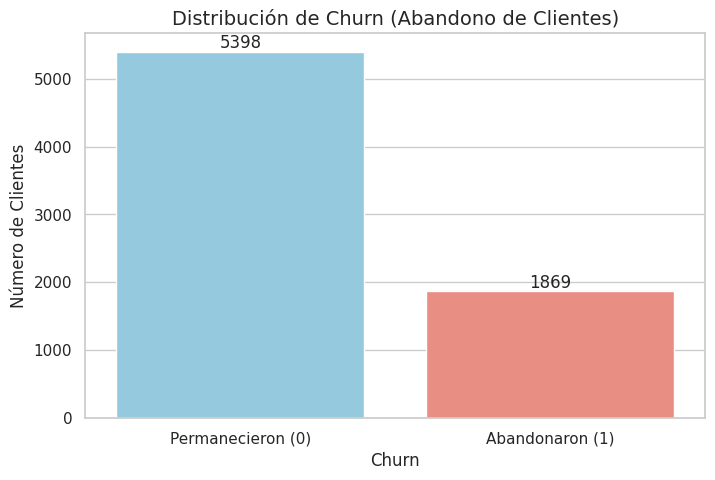

In [291]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 5))
sns.barplot(x=churn_counts.index,y=churn_counts.values,hue=churn_counts.index,palette=["skyblue", "salmon"],legend=False)

plt.title('Distribución de Churn (Abandono de Clientes)', fontsize=14)
plt.ylabel('Número de Clientes', fontsize=12)
plt.xticks([0, 1], ['Permanecieron (0)', 'Abandonaron (1)'])

for i, count in enumerate(churn_counts.values):
    plt.text(i, count + 50, str(count), ha='center', fontsize=12)

plt.show()

In [292]:
hombres = df_final[df_final['gender'] == 'Male']['Churn'].value_counts()
mujeres = df_final[df_final['gender'] == 'Female']['Churn'].value_counts()

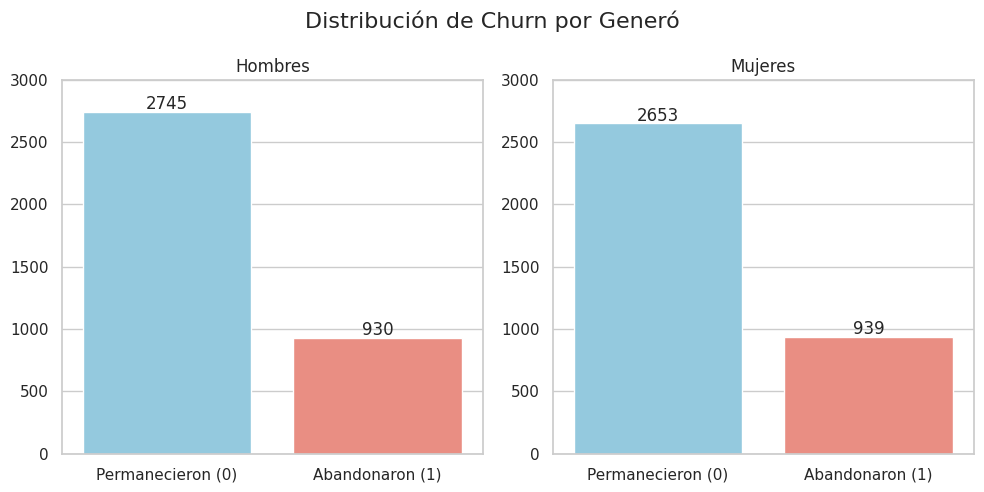

In [293]:
sns.set(style="whitegrid")
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Churn por Generó', fontsize=16)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 3000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(hombres, ax1, 'Hombres')
plot_churn(mujeres, ax2, 'Mujeres')

plt.tight_layout()
plt.show()

In [294]:
no_senior = df_final[df_final['SeniorCitizen'] == 0]['Churn'].value_counts()
senior = df_final[df_final['SeniorCitizen'] == 1]['Churn'].value_counts()

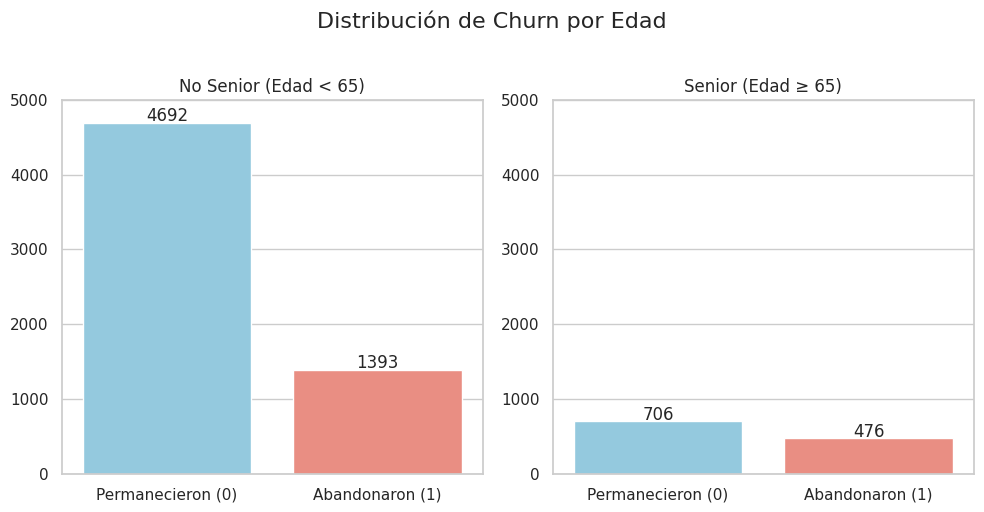

In [295]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle('Distribución de Churn por Edad', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 5000)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(no_senior, axs[0], 'No Senior (Edad < 65)')
plot_churn(senior, axs[1], 'Senior (Edad ≥ 65)')

plt.tight_layout()
plt.show()

In [296]:
df_final['Contract'].unique()

array(['One year', 'Month-to-month', 'Two year'], dtype=object)

In [297]:
anio = df_final[df_final['Contract'] == 'One year']['Churn'].value_counts()
mes = df_final[df_final['Contract'] == 'Month-to-month']['Churn'].value_counts()
anios2= df_final[df_final['Contract'] == 'Two year']['Churn'].value_counts()

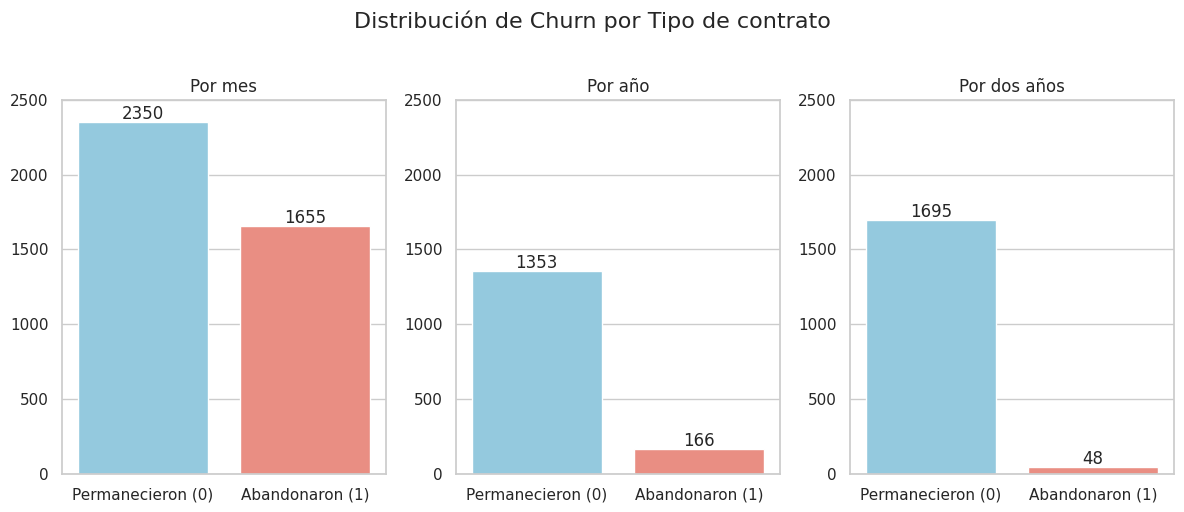

In [298]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
plt.suptitle('Distribución de Churn por Tipo de contrato', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 2500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(mes, axs[0], 'Por mes')
plot_churn(anio, axs[1], 'Por año')
plot_churn(anios2, axs[2], 'Por dos años')

plt.tight_layout()
plt.show()

In [299]:
df_final['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [300]:
check = df_final[df_final['PaymentMethod'] == 'Mailed check']['Churn'].value_counts()
Electronic  = df_final[df_final['PaymentMethod'] == 'Electronic check']['Churn'].value_counts()
Credit = df_final[df_final['PaymentMethod'] == 'Credit card (automatic)']['Churn'].value_counts()
Bank = df_final[df_final['PaymentMethod'] == 'Bank transfer (automatic)']['Churn'].value_counts()

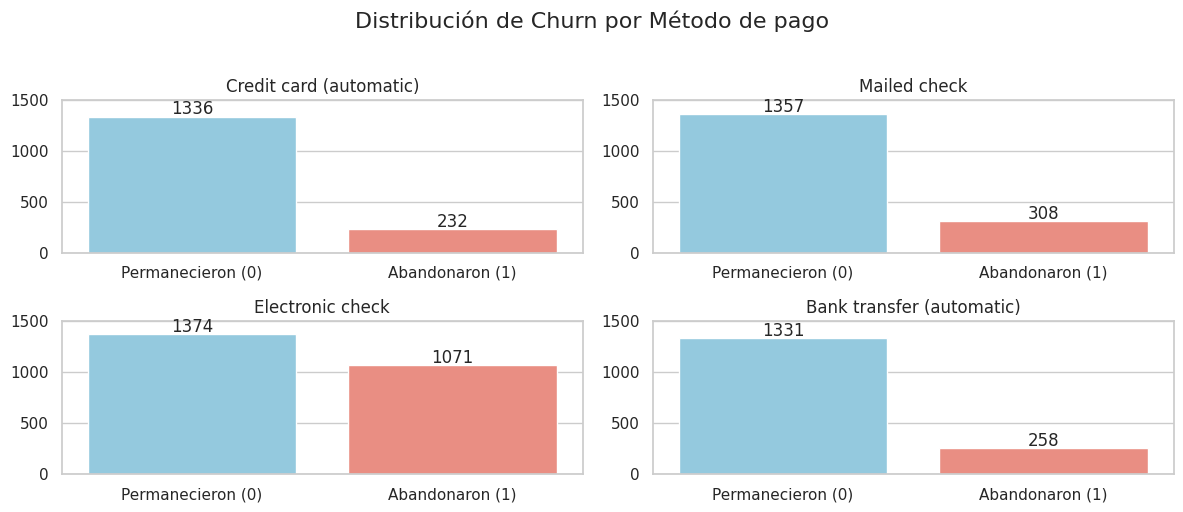

In [301]:
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 5))
plt.suptitle('Distribución de Churn por Método de pago', fontsize=16, y=1.02)

def plot_churn(data, ax, title):
    sns.barplot(
        x=data.index,
        y=data.values,
        hue=data.index,
        palette=["skyblue", "salmon"],
        legend=False,
        ax=ax
    )
    ax.set_title(title)
    ax.set_xlabel('')
    ax.set_xticks([0,1])
    ax.set_xticklabels(['Permanecieron (0)', 'Abandonaron (1)'])
    ax.set_ylim(0, 1500)
    for i, count in enumerate(data.values):
        ax.text(i, count+20, str(count), ha='center')

plot_churn(check, axs[0][1], 'Mailed check')
plot_churn(Electronic, axs[1][0], 'Electronic check')
plot_churn(Credit, axs[0][0], 'Credit card (automatic)')
plot_churn(Bank, axs[1][1], 'Bank transfer (automatic)')


plt.tight_layout()
plt.show()

In [302]:
TotalGastado1 = df_final[df_final['Churn'] == 1]['Charges.Total']
TotalGastado0 = df_final[df_final['Churn'] == 0]['Charges.Total']
tiempoDeContrato0 = df_final[df_final['Churn'] == 0]['tenure']
tiempoDeContrato1 = df_final[df_final['Churn'] == 1]['tenure']

In [303]:
print("--- Total Gastado (Churn = 1) ---")
print(TotalGastado1.describe())
print("\n--- Total Gastado (Churn = 0) ---")
print(TotalGastado0.describe())

print("\n--- Tiempo de Contrato (Churn = 1) ---")
print(tiempoDeContrato1.describe())
print("\n--- Tiempo de Contrato (Churn = 0) ---")
print(tiempoDeContrato0.describe())

--- Total Gastado (Churn = 1) ---
count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: Charges.Total, dtype: float64

--- Total Gastado (Churn = 0) ---
count    5398.000000
mean     2535.263977
std      2330.802193
min         0.000000
25%       564.362500
50%      1663.625000
75%      4237.275000
max      8672.450000
Name: Charges.Total, dtype: float64

--- Tiempo de Contrato (Churn = 1) ---
count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

--- Tiempo de Contrato (Churn = 0) ---
count    5398.000000
mean       37.321045
std        24.178367
min         0.000000
25%        14.000000
50%        37.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64


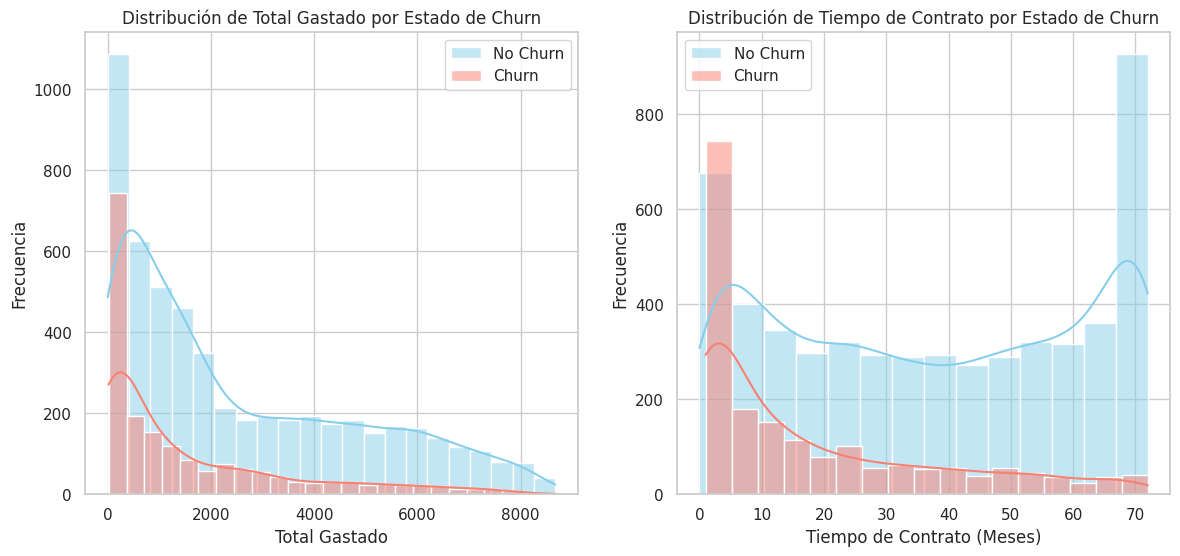

In [304]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(TotalGastado0, color='skyblue', label='No Churn', kde=True)
sns.histplot(TotalGastado1, color='salmon', label='Churn', kde=True)
plt.title('Distribución de Total Gastado por Estado de Churn')
plt.xlabel('Total Gastado')
plt.ylabel('Frecuencia')
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(tiempoDeContrato0, color='skyblue', label='No Churn', kde=True)
sns.histplot(tiempoDeContrato1, color='salmon', label='Churn', kde=True)
plt.title('Distribución de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Tiempo de Contrato (Meses)')
plt.ylabel('Frecuencia')
plt.legend()

plt.show()

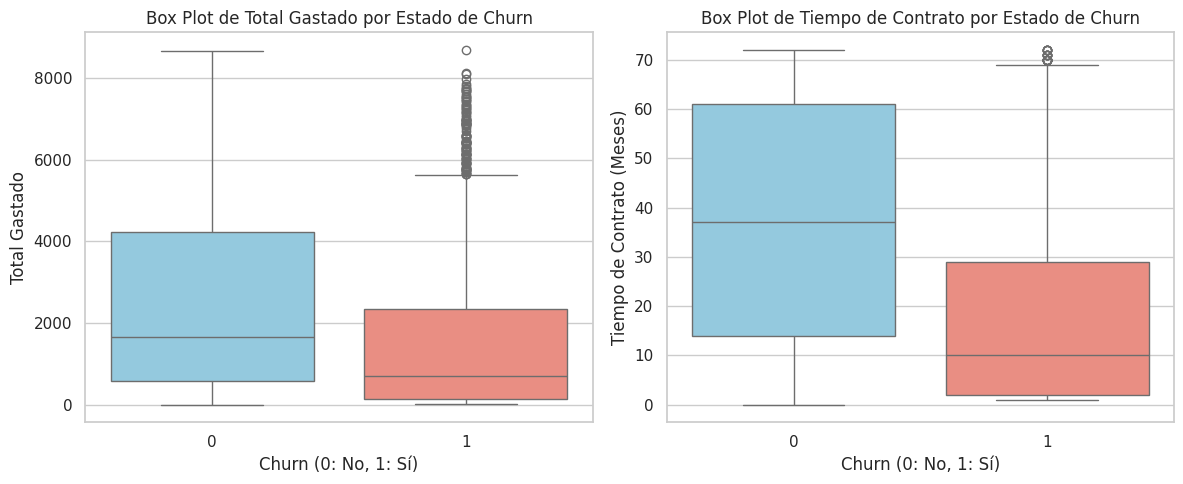

In [305]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Churn', y='Charges.Total', data=df_final, palette={'0': 'skyblue', '1': 'salmon'})
plt.title('Box Plot de Total Gastado por Estado de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Total Gastado')

plt.subplot(1, 2, 2)
sns.boxplot(x='Churn', y='tenure', data=df_final, palette={'0': 'skyblue', '1': 'salmon'})
plt.title('Box Plot de Tiempo de Contrato por Estado de Churn')
plt.xlabel('Churn (0: No, 1: Sí)')
plt.ylabel('Tiempo de Contrato (Meses)')

plt.tight_layout()
plt.show()

##RandomForestClassifier


In [306]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
print('Librerias cargadas con exito!')


Librerias cargadas con exito!


In [309]:
dt.head()

NameError: name 'dt' is not defined

In [ ]:
s

In [307]:
arbol = DecisionTreeClassifier(max_depth = 3)
random_forest = RandomForestClassifier(max_depth = 2)


#Ajustamos nuestro modelo utilizando el metodo fit().
#Y para evaluar la taza de acierto utilizamos el metodo score()
#Para nuestro algoritmo de arbol de decision.
arbol.fit(X_test, y_test)
print(f'Precisión de entrenamiento: {arbol.score(X_test, y_test)}')
print(f'Precisión de prueba: {arbol.score(X_val, y_val)}')

NameError: name 'X_test' is not defined

## Informe final







Estadísticas Descriptivas:

--- Total Gastado (Churn = 1) ---
count    1869.000000

mean     1531.796094

std      1890.822994

min        18.850000

25%       134.500000

50%       703.550000

75%      2331.300000

max      8684.800000


**Visualización (Box Plot):**

El box plot refuerza que la caja (que representa el 50% central de los datos) y la mediana para los clientes que cancelan están ubicadas en un rango de valores mucho más bajo que para los que no cancelan. Hay una presencia notable de outliers de alto gasto en el grupo de churn, pero la mayoría se concentra en el rango inferior.

**Tiempo de Contrato (Tenure):**

Estadísticas Descriptivas:

--- Tiempo de Contrato (Churn = 1) ---
count    1869.000000

mean       17.979133

std        19.531123

min         1.000000

25%         2.000000

50%        10.000000

75%        29.000000

max        72.000000

Name: tenure, dtype: float64

--- Tiempo de Contrato (Churn = 0) ---

count    5398.000000

mean       37.321045

std        24.178367

min         0.000000

25%        14.000000

50%        37.000000

75%        61.000000

max        72.000000

Name: tenure, dtype: float64

Observaciones: Los clientes que cancelaron presentan un tiempo de contrato promedio mucho más corto (17.98 meses) y una mediana de solo 10 meses, mientras que los que no cancelaron tienen un promedio de 37.32 meses y una mediana de 37 meses. El 75% de los clientes que hicieron churn lo hicieron antes de los 29 meses, lo cual está muy por debajo de la mediana (50%) de los clientes que no abandonaron.

Análisis Visual: Box Plot

El box plot revela que los clientes que cancelan suelen tener un tiempo de contrato muy corto, con la mediana ubicada en el primer cuartil de quienes permanecen. Esto indica que la mayoría abandona temprano en su relación con la empresa.

Análisis Visual: Histograma

El histograma del tiempo de contrato muestra un pico claro de abandono en los primeros meses. Mientras tanto, los clientes que siguen activos presentan una distribución más pareja, con mayor frecuencia en contratos largos.

Principales Hallazgos

Clientes con mayor riesgo: Contratos mensuales, uso de cheque electrónico, perfil no senior, bajo gasto acumulado y corta duración del contrato son señales de alta probabilidad de churn.

Importancia de los primeros meses: Gran parte de las cancelaciones ocurre entre los primeros 10 y 20 meses, destacando la relevancia de la experiencia inicial.

Relación gasto-churn: Los clientes con menor gasto total tienden a abandonar con más frecuencia.

Método de pago: El uso de cheque electrónico está asociado a una tasa de abandono más alta en comparación con tarjeta de crédito.

Contratos largos como ancla: Los contratos de dos años reducen considerablemente la probabilidad de churn.

Estos puntos son la base para construir modelos predictivos y diseñar estrategias enfocadas en retención.

Recomendaciones para Telecom X

Mejorar la experiencia inicial: Crear un programa de bienvenida que incluya seguimiento personalizado, tutoriales y promociones durante los primeros 3 a 6 meses.

Fomentar contratos largos: Incentivar la migración de contratos mensuales a contratos de 1 o 2 años mediante descuentos y beneficios claros.

Gestionar métodos de pago: Investigar causas del churn en usuarios de cheque electrónico y promover métodos más estables, ofreciendo incentivos para el cambio.

Segmentación y ofertas: Dirigir campañas específicas a clientes con bajo gasto y a no seniors, con paquetes y promociones adaptadas.

Modelos predictivos: Incorporar variables clave como gasto total, duración y método de pago para anticipar clientes con alto riesgo de abandono.


In [311]:
df

,id_cliente,evasion,genero,senior,pareja,dependientes,antiguedad,s_telefono,multipleslineas,s_internet,...,serv_tec,tv_str,pel_str,contrato,boleta_elec,met_pago,pago_mensual,pago_total,cuentas_diarias,total_servicios_binarios
0,0002-ORFBO,0,1,0,1,1,9,1,0,1,...,1,1,0,2,1,2,65.60,593.30,2.19,5
1,0003-MKNFE,0,0,0,0,0,9,1,1,1,...,0,0,1,1,0,2,59.90,542.40,2.00,4
2,0004-TLHLJ,1,0,0,0,0,4,1,0,1,...,0,0,0,1,1,1,73.90,280.85,2.46,3
3,0011-IGKFF,1,0,1,1,0,13,1,0,1,...,0,1,1,1,1,1,98.00,1237.85,3.27,6
4,0013-EXCHZ,1,1,1,1,0,3,1,0,1,...,1,1,0,1,1,2,83.90,267.40,2.80,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-LUTYD,0,1,0,0,0,13,1,0,1,...,1,0,0,2,0,2,55.15,742.90,1.84,4
7263,9992-RRAMN,1,0,0,1,0,22,1,1,1,...,0,0,1,1,1,1,85.10,1873.70,2.84,4
7264,9992-UJOEL,0,0,0,0,0,2,1,0,1,...,0,0,0,1,1,2,50.30,92.75,1.68,3
7265,9993-LHIEB,0,0,0,1,1,67,1,0,1,...,1,0,1,3,0,2,67.85,4627.65,2.26,6
